In [25]:
#Made by Maher Gomaa and George A.saed#
#modules
from PIL import Image, ImageDraw, ImageOps
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras import layers, models
import keras

In [27]:
# Load the FER2013 dataset
csv_path = 'D:/Programing/fer/fer2013/fer2013.csv'
data = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print(data.head())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training


In [29]:

from sklearn.model_selection import train_test_split

# Convert pixels into a numpy array
def preprocess_pixels(pixels):
    pixels = np.array(pixels.split(), dtype='float32')  # Convert pixel string to array
    pixels = pixels.reshape(48, 48)  # Reshape to 48x48 image
    return pixels

# Apply the preprocessing to the 'pixels' column
data['pixels'] = data['pixels'].apply(preprocess_pixels)

# Convert the data to numpy arrays
X = np.stack(data['pixels'].values)
y = data['emotion'].values

# Normalize pixel values (0-1 range)
X = X / 255.0

# Reshape X to add channel dimension (for CNN input)
X = X.reshape(-1, 48, 48, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} images")
print(f"Test set size: {X_test.shape[0]} images")

Training set size: 28709 images
Test set size: 7178 images


In [61]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 classes for 7 emotions
])


# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

D:\Programing\3esamanaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, shuffle = False,batch_size = 512,
                    validation_data=(X_test, y_test))



Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step - accuracy: 0.8166 - loss: 0.4406 - val_accuracy: 0.5514 - val_loss: 3.0763
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - accuracy: 0.8274 - loss: 0.4152 - val_accuracy: 0.5574 - val_loss: 3.0291
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 221ms/step - accuracy: 0.8298 - loss: 0.4048 - val_accuracy: 0.5566 - val_loss: 3.1990
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - accuracy: 0.8332 - loss: 0.3860 - val_accuracy: 0.5573 - val_loss: 3.2148
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - accuracy: 0.8414 - loss: 0.3767 - val_accuracy: 0.5587 - val_loss: 3.1918
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.8424 - loss: 0.3684 - val_accuracy: 0.5554 - val_loss: 3.2786
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step - accuracy: 0.8461 - loss: 0.3563 - val_accuracy: 0.5582 - val_loss: 3.3189
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - accuracy: 0.8463 - loss: 0.3598 - val_accu

In [117]:
##saving the model 
model.save('fer_testma8559.keras')

In [119]:
# Load the pre-trained model
model = tf.keras.models.load_model('fer_testma8559.keras')

In [121]:
# Load the Haar Cascade face detector from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral' ,'Sad', 'Surprise' ]

In [123]:
# Function to preprocess face for model input
def preprocess_face(face):
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    face = cv2.resize(face, (48, 48))  # Resize to 48x48
    face = face / 255.0  # Normalize
    face = np.reshape(face, (1, 48, 48, 1))  # Reshape to match model input
    return face

In [21]:
# Start webcam feed
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Loop through detected faces
    for (x, y, w, h) in faces:
        # Extract the face from the frame
        face = frame[y:y+h, x:x+w]

        # Preprocess the face for emotion prediction
        processed_face = preprocess_face(face)

        # Predict emotion
        emotion_prediction = model.predict(processed_face)
        emotion_label = emotion_labels[np.argmax(emotion_prediction)]

        # Draw rectangle around face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Put emotion label on the frame
        cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the frame with the detected face and emotion
    cv2.imshow('Real-time Emotion Recognition', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Predicted Emotion: 6, True Emotion: 3


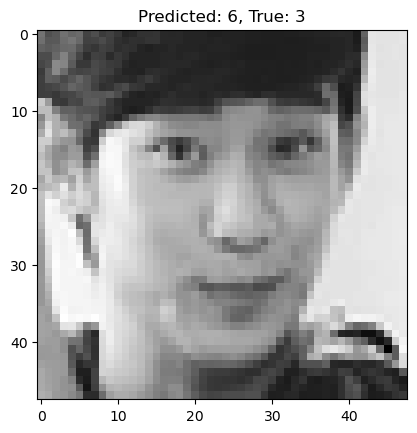

In [151]:
# Make predictions on the test set
predictions = model.predict(X_test)
randomp = np.random.randint(0 , 7000)
# Get the predicted emotion for the first test image
predicted_emotion = np.argmax(predictions[randomp])
print(f"Predicted Emotion: {predicted_emotion}, True Emotion: {y_test[randomp]}")

# Plot the first test image and the prediction
plt.imshow(X_test[randomp].reshape(48, 48), cmap='gray')
plt.title(f"Predicted: {predicted_emotion}, True: {y_test[randomp]}")
plt.show()